<a href="https://colab.research.google.com/github/franciskyalo/datavisualization_example/blob/main/datavisualization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image

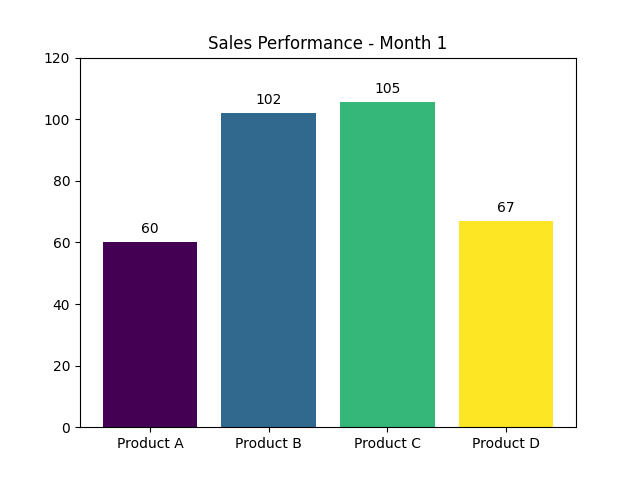

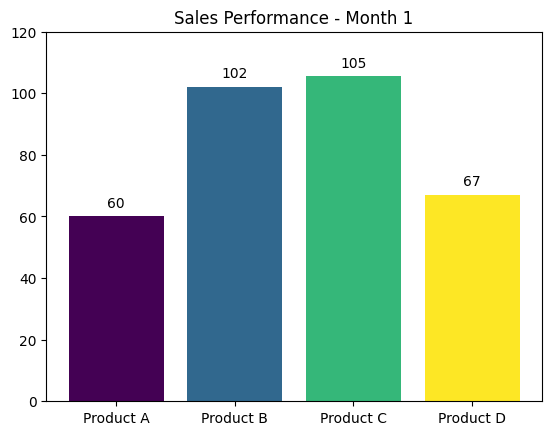

In [ ]:
# Create sample data for animation
categories = ["Product A", "Product B", "Product C", "Product D"]
fig, ax = plt.subplots()


def animate_bars(frame):
    ax.clear()
    # Simulate changing data over time
    values = [np.sin(frame / 10 + i) * 50 + 60 for i in range(4)]
    colors = plt.cm.viridis(np.linspace(0, 1, 4))

    bars = ax.bar(categories, values, color=colors)
    ax.set_ylim(0, 120)
    ax.set_title(f"Sales Performance - Month {frame + 1}")

    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 2,
            f"{value:.0f}",
            ha="center",
            va="bottom",
        )

    return bars


ani = animation.FuncAnimation(fig, animate_bars, frames=50, interval=100)
ani.save("bar_race_animation.gif", writer="pillow", fps=5)

Image("bar_race_animation.gif")


In [ ]:
!pip install pygal

import pygal
from IPython.display import SVG

# Create a simple bar chart
bar_chart = pygal.Bar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9])

# Render the chart as SVG
# SVG(bar_chart.render()) # Uncomment this line to display the SVG directly in Colab

# Or save it to a file and then display (useful if direct SVG display is not working consistently)
bar_chart.render_to_file('bar_chart.svg')
# To display the saved SVG, you might need a different approach like:
# from IPython.display import Image
# Image(filename='bar_chart.svg') # This will try to render it as a PNG, might not work perfectly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.9 MB/s eta 0:00:00


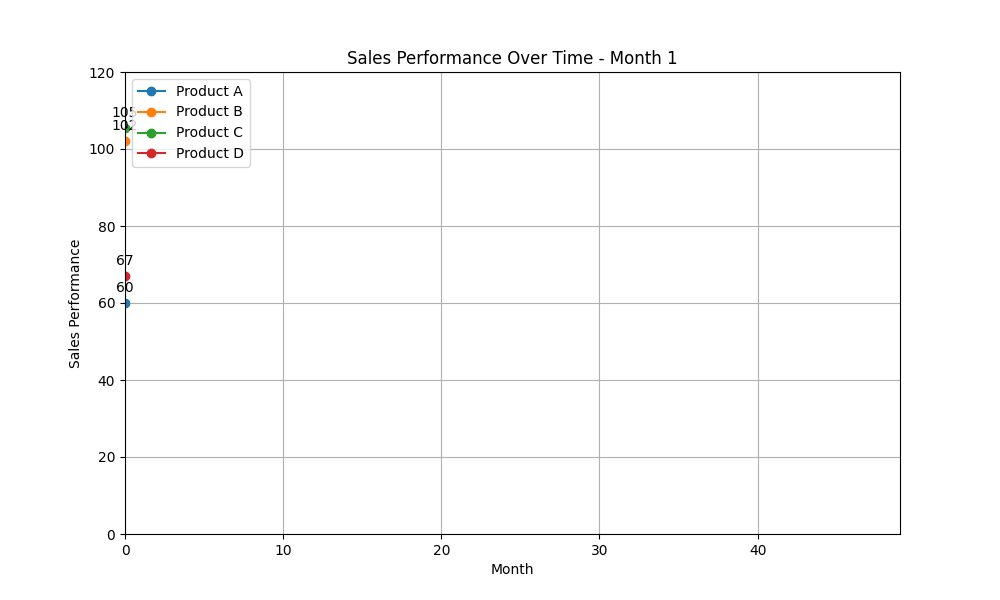

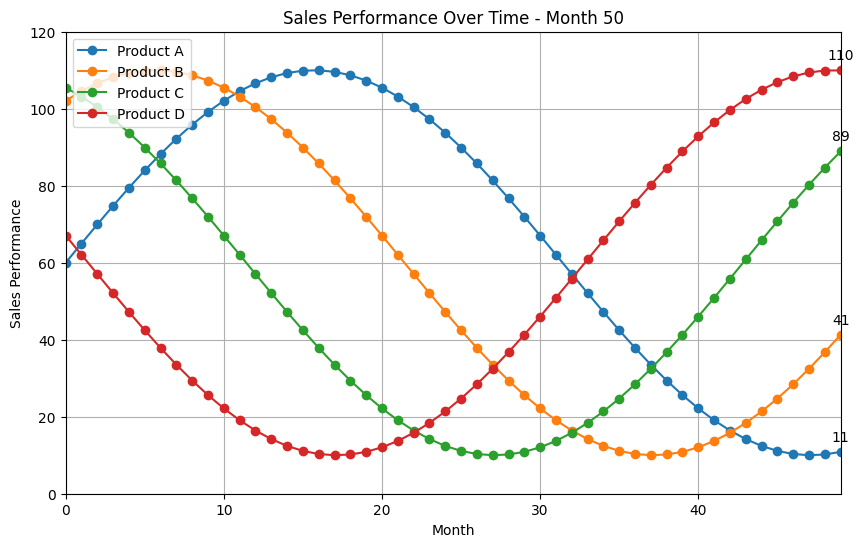

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image

# Create sample data for animation
categories = ["Product A", "Product B", "Product C", "Product D"]
num_frames = 50

fig, ax = plt.subplots(figsize=(10, 6))

# Initialize empty lines for each category
lines = [ax.plot([], [], label=cat, marker='o')[0] for cat in categories]
text_labels = [ax.text(0, 0, '', ha='center', va='bottom') for _ in categories] # For value labels

ax.set_xlim(0, num_frames - 1)
ax.set_ylim(0, 120)
ax.set_xlabel("Month")
ax.set_ylabel("Sales Performance")
ax.set_title("Sales Performance Over Time")
ax.legend(loc='upper left')
ax.grid(True)

# Store historical values for each product
historical_values = [[] for _ in categories]

def animate_lines(frame):
    # Reset historical data if it's the first frame of an animation sequence.
    # This handles cases where FuncAnimation or ani.save might call animate_lines
    # for initialization or multiple times, ensuring a clean start.
    if frame == 0:
        for sublist in historical_values:
            sublist.clear()

    # Simulate changing data over time for each category
    current_values = [np.sin(frame / 10 + i) * 50 + 60 for i in range(len(categories))]

    # Update historical values
    for i, val in enumerate(current_values):
        historical_values[i].append(val)

    # Update data for each line
    for i, line in enumerate(lines):
        # Ensure x-data matches the length of accumulated y-data
        x_data = range(len(historical_values[i]))
        y_data = historical_values[i]
        line.set_data(x_data, y_data)

        # Update text label at the end of the line
        if len(y_data) > 0: # Only update if there is data to display
            text_labels[i].set_position((x_data[-1], y_data[-1] + 2))
            text_labels[i].set_text(f"{y_data[-1]:.0f}")

    ax.set_title(f"Sales Performance Over Time - Month {frame + 1}")

    # Return all artists that were modified for blitting
    return lines + text_labels + [ax.title]

# This reset ensures 'historical_values' is fresh when FuncAnimation is first created
# for interactive display, but the internal reset in animate_lines is key for ani.save.
historical_values = [[] for _ in categories]

ani = animation.FuncAnimation(
    fig, animate_lines, frames=num_frames, interval=100, blit=True
)
ani.save("line_chart_animation.gif", writer="pillow", fps=5)

Image("line_chart_animation.gif")

In [11]:
!pip install great_tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.9 MB/s eta 0:00:00


In [12]:
from great_tables import GT

In [14]:
# Create data with trend values as space-separated strings
kpi_data = pd.DataFrame({
    "metric": ["Revenue", "Users", "Conversion Rate"],
    "current": [125000.0, 45000.0, 3.2],
    "trend": [
        "95 102 98 115 125",
        "38 40 42 43 45",
        "2.8 2.9 3.0 3.1 3.2"
    ]
})

kpi_table = (
    GT(kpi_data, rowname_col="metric")
    .fmt_nanoplot(columns="trend", plot_type="line")
    .fmt_number(columns="current", compact=True)
    .tab_header(title="Weekly KPI Dashboard")
)

In [15]:
kpi_table

GT(_tbl_data=            metric   current                trend
0          Revenue  125000.0    95 102 98 115 125
1            Users   45000.0       38 40 42 43 45
2  Conversion Rate       3.2  2.8 2.9 3.0 3.1 3.2, _body=<great_tables._gt_data.Body object at 0x7c4a282ee060>, _boxhead=Boxhead([ColInfo(var='metric', type=<ColInfoTypeEnum.stub: 2>, column_label='metric', column_align='left', column_width=None), ColInfo(var='current', type=<ColInfoTypeEnum.default: 1>, column_label='current', column_align='right', column_width=None), ColInfo(var='trend', type=<ColInfoTypeEnum.default: 1>, column_label='trend', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c4a4663d160>, _spanners=Spanners([]), _heading=Heading(title='Weekly KPI Dashboard', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7c4a4666d070>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7c4a2825ade0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7c4a2825b6b0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7c4a28299730>, <great_tables._gt_data.FormatInfo object at 0x7c4a46689a90>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=O